***Import Libraries and Modules, and Set Display Configurations***

In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, ttest_ind
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pd.set_option("display.max_columns", 500)

***Read the data set in Pandas DataFrame***

In [4]:
automobiles = pd.read_csv(
    "./Data_Sets/Automobiles.data",
    names=[
        "symboling",
        "normalized-losses",
        "make",
        "fuel-type",
        "aspiration",
        "num-of-doors",
        "body-style",
        "drive-wheels",
        "engine-location",
        "wheel-base",
        "length",
        "width",
        "height",
        "curb-weight",
        "engine-type",
        "num-of-cylinders",
        "engine-size",
        "fuel-system",
        "bore",
        "stroke",
        "compression-ratio",
        "horsepower",
        "peak-rpm",
        "city-mpg",
        "highway-mpg",
        "price"
    ]
)

***Random Sample of 10 Observations***

In [5]:
automobiles.sample(n=10, random_state=10)

symboling normalized-losses       make fuel-type aspiration num-of-doors  \
131          2                 ?    renault       gas        std          two   
117          0               161     peugot       gas      turbo         four   
63           0                 ?      mazda    diesel        std            ?   
56           3               150      mazda       gas        std          two   
49           0                 ?     jaguar       gas        std          two   
60           0               115      mazda       gas        std         four   
19           1                98  chevrolet       gas        std          two   
171          2               134     toyota       gas        std          two   
163          1               168     toyota       gas        std          two   
203         -1                95      volvo    diesel      turbo         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
131  hatchback          fwd           front        96.1   176.8   66.6   
117      sedan          rwd           front       108.0   186.7   68.3   
63       sedan          fwd           front        98.8   177.8   66.5   
56   hatchback          rwd           front        95.3   169.0   65.7   
49       sedan          rwd           front       102.0   191.7   70.6   
60       sedan          fwd           front        98.8   177.8   66.5   
19   hatchback          fwd           front        94.5   155.9   63.6   
171  hatchback          rwd           front        98.4   176.2   65.6   
163      sedan          rwd           front        94.5   168.7   64.0   
203      sedan          rwd           front       109.1   188.8   68.9   

     height  curb-weight engine-type num-of-cylinders  engine-size  \
131    50.5         2460         ohc             four          132   
117    56.0         3130           l             four          134   
63     55.5         2443         ohc             four          122   
56     49.6         2380       rotor              two           70   
49     47.8         3950        ohcv           twelve          326   
60     55.5         2410         ohc             four          122   
19     52.0         1874         ohc             four           90   
171    52.0         2714         ohc             four          146   
163    52.6         2169         ohc             four           98   
203    55.5         3217         ohc              six          145   

    fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  \
131        mpfi  3.46   3.90                8.7          ?        ?        23   
117        mpfi  3.61   3.21                7.0        142     5600        18   
63          idi  3.39   3.39               22.7         64     4650        36   
56         4bbl     ?      ?                9.4        101     6000        17   
49         mpfi  3.54   2.76               11.5        262     5000        13   
60         2bbl  3.39   3.39                8.6         84     4800        26   
19         2bbl  3.03   3.11                9.6         70     5400        38   
171        mpfi  3.62   3.50                9.3        116     4800        24   
163        2bbl  3.19   3.03                9.0         70     4800        29   
203         idi  3.01   3.40               23.0        106     4800        26   

     highway-mpg  price  
131           31   9895  
117           24  18150  
63            42  10795  
56            23  11845  
49            17  36000  
60            32   8495  
19            43   6295  
171           30  11549  
163           34   8058  
203           27  22470

***Data Description***

In [6]:
# Shape of the DataFrame.
automobiles.shape  # 205 observations, 26 features.

(205, 26)

In [7]:
# More information, especially on the columns.
automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
# How many categorical feautures?
automobiles.dtypes[automobiles.dtypes == "object"].count()  # 16 categorical features.

16

In [9]:
# How many are numerical?
automobiles.dtypes[(automobiles.dtypes != "object")].count()  # 10 numerical features.

10

In [10]:
automobiles[automobiles == "?"].count()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

***Data Cleaning: Replace Missing Values for the Numeric Features***

In [11]:
def replace_missing_values(data, feature, needle, replacement):
    data.loc[data[feature] == needle, feature] = replacement

In [12]:
def typecast_feature_values(data, feature, cast_as=np.float64):
    data[feature] = data[feature].astype(cast_as)

In [13]:
automobiles_1 = automobiles.copy()  # Take a copy of automobiles data set.

In [14]:
numeric_features_with_missing_values_list = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]

In [15]:
# Replace missing values with the mean of all other values of the respective numeric feature.
for feature in numeric_features_with_missing_values_list:
    replace_missing_values(automobiles_1, feature, "?", 0.0)  # First replace all "?" with 0.    
    typecast_feature_values(automobiles_1, feature)  # Typecast it from string to numeric.
    replace_missing_values(automobiles_1, feature, 0.0, automobiles_1[feature].mean())  # Replace with mean.

In [16]:
automobiles_1.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3               97.6  alfa-romero       gas        std   
1          3               97.6  alfa-romero       gas        std   
2          1               97.6  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi  3.47    2.68                9.0       111.0    5000.0   
1        mpfi  3.47    2.68                9.0       111.0    5000.0   
2        mpfi  2.68    3.47                9.0       154.0    5000.0   
3        mpfi  3.19    3.40               10.0       102.0    5500.0   
4        mpfi  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19           26  16500.0  
3        24           30  13950.0  
4        18           22  17450.0

In [17]:
numeric_features = automobiles_1.dtypes[automobiles_1.dtypes != "object"].index.tolist()
numeric_features.remove("symboling")
automobiles_1[numeric_features].head()

normalized-losses  wheel-base  length  width  height  curb-weight  \
0               97.6        88.6   168.8   64.1    48.8         2548   
1               97.6        88.6   168.8   64.1    48.8         2548   
2               97.6        94.5   171.2   65.5    52.4         2823   
3              164.0        99.8   176.6   66.2    54.3         2337   
4              164.0        99.4   176.6   66.4    54.3         2824   

   engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          130  3.47    2.68                9.0       111.0    5000.0   
1          130  3.47    2.68                9.0       111.0    5000.0   
2          152  2.68    3.47                9.0       154.0    5000.0   
3          109  3.19    3.40               10.0       102.0    5500.0   
4          136  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19           26  16500.0  
3        24           30  13950.0  
4        18           22  17450.0

In [18]:
automobiles_1[numeric_features].describe().T

count          mean          std      min      25%  \
normalized-losses  205.0    117.120000    33.157365    65.00    97.60   
wheel-base         205.0     98.756585     6.021776    86.60    94.50   
length             205.0    174.049268    12.337289   141.10   166.30   
width              205.0     65.907805     2.145204    60.30    64.10   
height             205.0     53.724878     2.443522    47.80    52.00   
curb-weight        205.0   2555.565854   520.680204  1488.00  2145.00   
engine-size        205.0    126.907317    41.642693    61.00    97.00   
bore               205.0      3.328484     0.270993     2.54     3.15   
stroke             205.0      3.254183     0.313721     2.07     3.11   
compression-ratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower         205.0    104.246234    39.519338    48.00    70.00   
peak-rpm           205.0   5124.881618   477.004538  4150.00  4800.00   
city-mpg           205.0     25.219512     6.542142    13.00    19.00   
highway-mpg        205.0     30.751220     6.886443    16.00    25.00   
price              205.0  13202.101059  7868.849339  5118.00  7788.00   

                        50%       75%       max  
normalized-losses    103.00    137.00    256.00  
wheel-base            97.00    102.40    120.90  
length               173.20    183.10    208.10  
width                 65.50     66.90     72.30  
height                54.10     55.50     59.80  
curb-weight         2414.00   2935.00   4066.00  
engine-size          120.00    141.00    326.00  
bore                   3.31      3.58      3.94  
stroke                 3.29      3.41      4.17  
compression-ratio      9.00      9.40     23.00  
horsepower            95.00    116.00    288.00  
peak-rpm            5200.00   5500.00   6600.00  
city-mpg              24.00     30.00     49.00  
highway-mpg           30.00     34.00     54.00  
price              10595.00  16500.00  45400.00

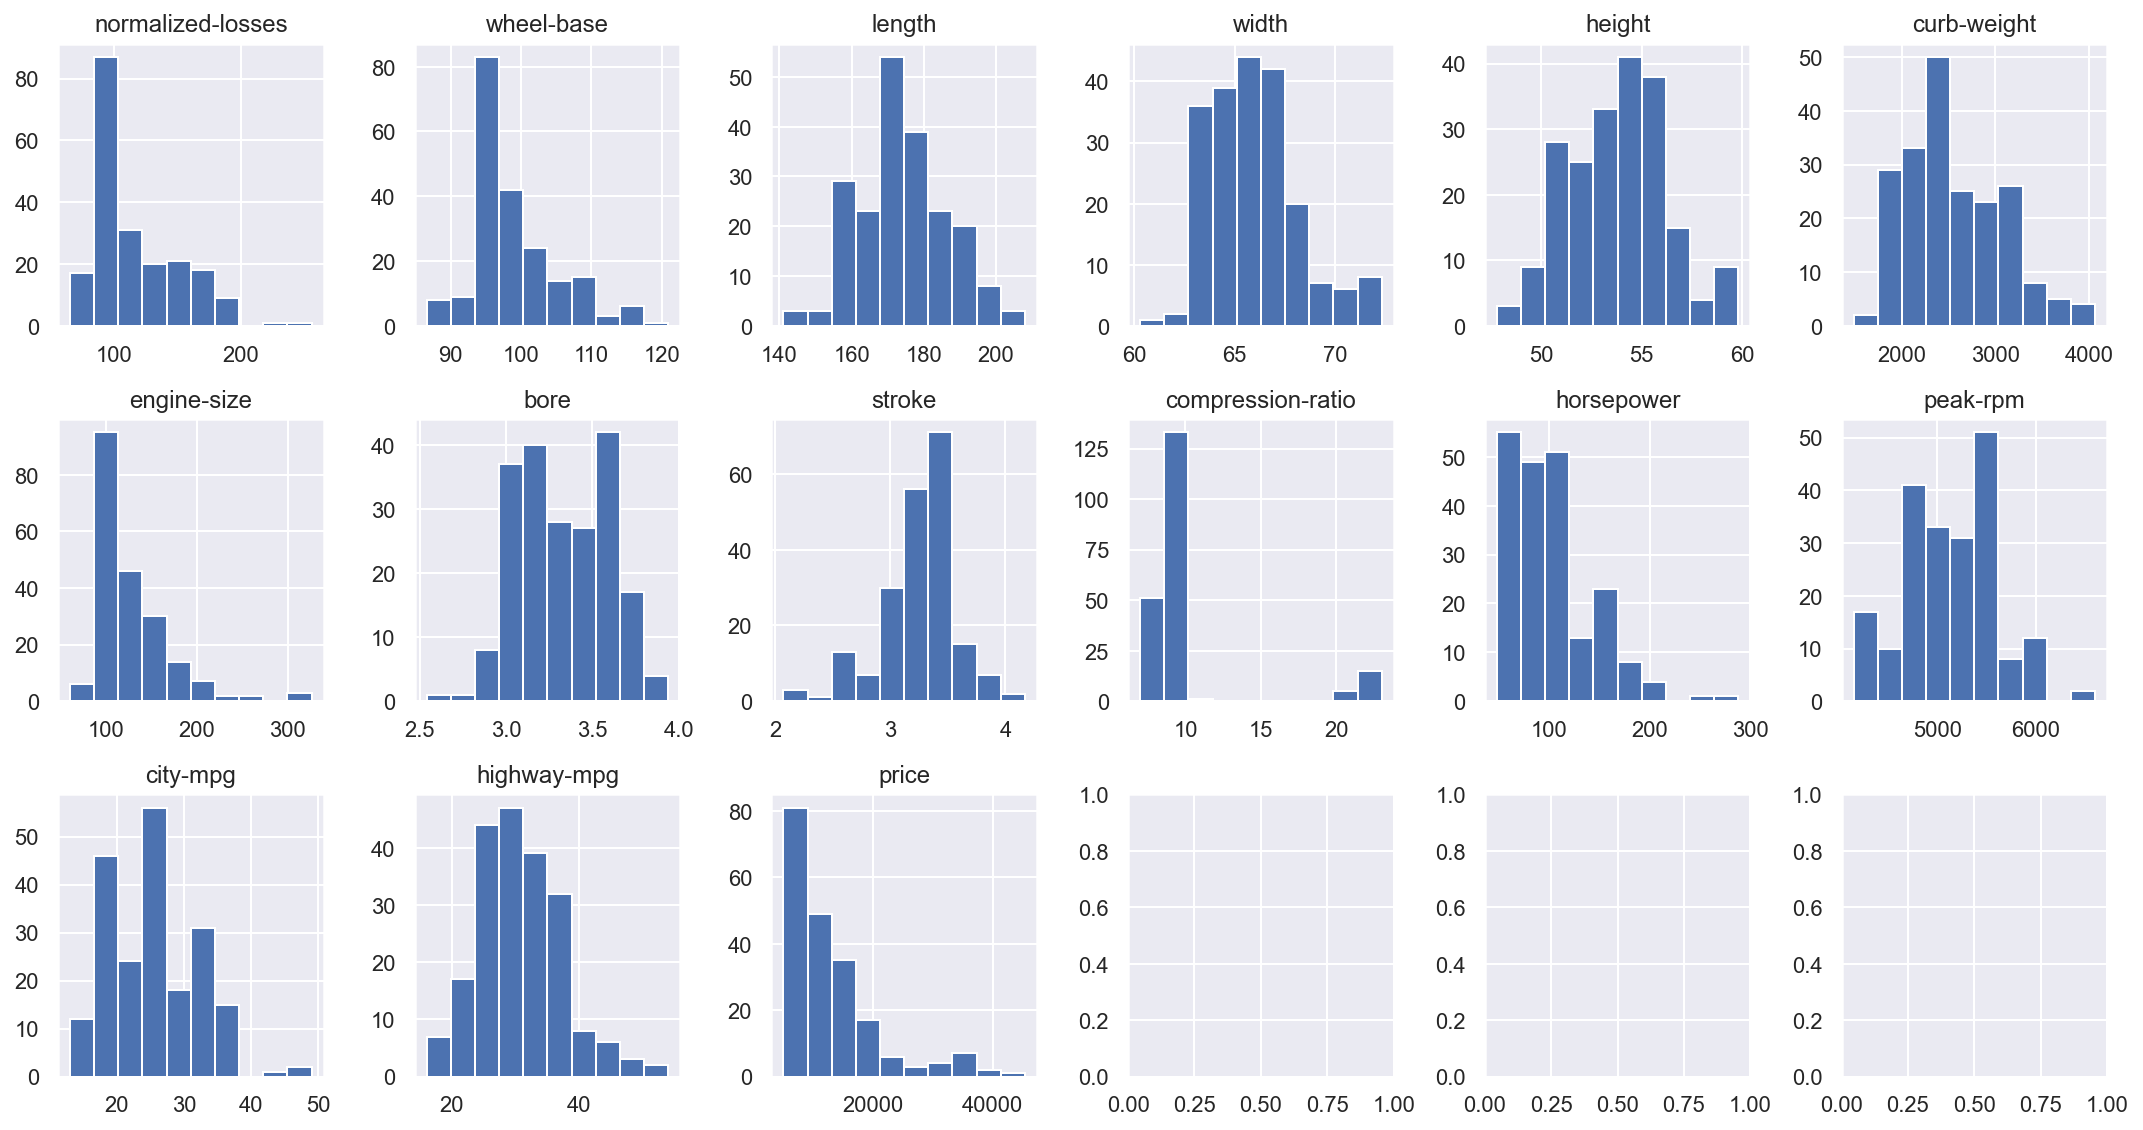

In [19]:
figure, axes = plt.subplots(nrows=3, ncols=6, figsize=(15, 8))
count = 0
for plot_set in axes:
    for plot in plot_set:
        plot.hist(automobiles_1[numeric_features[count]])
        plot.set_title(numeric_features[count])
        count += 1
        if len(numeric_features) == count:
            break
plt.tight_layout()

***Feature Engineering: Remove Skew of the Numeric Features Wherever Applicable/Necessary***

In [20]:
automobiles_2 = automobiles_1.copy()  # Take a copy of the current data set.

In [21]:
numeric_features = automobiles_2.dtypes[automobiles_2.dtypes != "object"].index.tolist()
numeric_features.remove("symboling")
numeric_features.remove("normalized-losses")
automobiles_2[numeric_features].skew()

wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
bore                 0.034077
stroke              -0.677164
compression-ratio    2.610862
horsepower           1.398510
peak-rpm             0.076666
city-mpg             0.663704
highway-mpg          0.539997
price                1.829203
dtype: float64

In [22]:
for feature in ["wheel-base", "width", "engine-size", "compression-ratio", "horsepower", "price"]:
    automobiles_2[feature] = np.log(automobiles_2[feature])

In [23]:
automobiles_2[numeric_features].skew()

wheel-base           0.883387
length               0.155954
width                0.813993
height               0.063123
curb-weight          0.681398
engine-size          0.857828
bore                 0.034077
stroke              -0.677164
compression-ratio    2.349716
horsepower           0.471507
peak-rpm             0.076666
city-mpg             0.663704
highway-mpg          0.539997
price                0.670314
dtype: float64

***Feature Enginnering: Scale the Numeric Features***

In [24]:
automobiles_3 = automobiles_2.copy()  # Take a copy of the current data set.

In [25]:
standard_scaler = StandardScaler()

In [26]:
numeric_features_to_scale = automobiles_3.dtypes[(automobiles_3.dtypes != "object")].index.tolist()
numeric_features_to_scale.remove("symboling")
numeric_features_to_scale.remove("normalized-losses")
numeric_features_to_scale

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [27]:
automobiles_3.loc[:, numeric_features_to_scale] = standard_scaler.fit_transform(automobiles_3.loc[:, numeric_features_to_scale])
automobiles_3

symboling  normalized-losses         make fuel-type aspiration  \
0            3               97.6  alfa-romero       gas        std   
1            3               97.6  alfa-romero       gas        std   
2            1               97.6  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front   -1.802494   
1            two  convertible          rwd           front   -1.802494   
2            two    hatchback          rwd           front   -0.713860   
3           four        sedan          fwd           front    0.207605   
4           four        sedan          4wd           front    0.139788   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front    1.712132   
201         four        sedan          rwd           front    1.712132   
202         four        sedan          rwd           front    1.712132   
203         four        sedan          rwd           front    1.712132   
204         four        sedan          rwd           front    1.712132   

       length     width    height  curb-weight engine-type num-of-cylinders  \
0   -0.426521 -0.851793 -2.020417    -0.014566        dohc             four   
1   -0.426521 -0.851793 -2.020417    -0.014566        dohc             four   
2   -0.231513 -0.177535 -0.543527     0.514882        ohcv              six   
3    0.207256  0.154209  0.235942    -0.420797         ohc             four   
4    0.207256  0.248349  0.235942     0.516807         ohc             five   
..        ...       ...       ...          ...         ...              ...   
200  1.198549  1.401745  0.728239     0.763241         ohc             four   
201  1.198549  1.356419  0.728239     0.949992         ohc             four   
202  1.198549  1.401745  0.728239     0.878757        ohcv              six   
203  1.198549  1.401745  0.728239     1.273437         ohc              six   
204  1.198549  1.401745  0.728239     0.975021         ohc             four   

     engine-size fuel-system      bore    stroke  compression-ratio  \
0       0.238597        mpfi  0.523492 -1.834718          -0.249214   
1       0.238597        mpfi  0.523492 -1.834718          -0.249214   
2       0.792476        mpfi -2.398844  0.689610          -0.249214   
3      -0.385569        mpfi -0.512273  0.465935           0.125009   
4       0.398443        mpfi -0.512273  0.465935          -0.667559   
..           ...         ...       ...       ...                ...   
200     0.526350        mpfi  1.670231 -0.332903          -0.057176   
201     0.526350        mpfi  1.670231 -0.332903          -0.369626   
202     1.250934        mpfi  0.930399 -1.227601          -0.329033   
203     0.625452         idi -1.178121  0.465935           3.083364   
204     0.526350        mpfi  1.670231 -0.332903          -0.057176   

     horsepower  peak-rpm  city-mpg  highway-mpg     price  
0      0.363081 -0.262445 -0.646553    -0.546059  0.317600  
1      0.363081 -0.262445 -0.646553    -0.546059  0.722631  
2      1.314914 -0.262445 -0.953012    -0.691627  0.722631  
3      0.117268  0.788329 -0.186865    -0.109354  0.384407  
4      0.465996  0.788329 -1.106241    -1.273900  0.835410  
..          ...       ...       ...          ...       ...  
200    0.440607  0.578175 -0.34009

In [28]:
automobiles_3[numeric_features_to_scale].head()

wheel-base    length     width    height  curb-weight  engine-size  \
0   -1.802494 -0.426521 -0.851793 -2.020417    -0.014566     0.238597   
1   -1.802494 -0.426521 -0.851793 -2.020417    -0.014566     0.238597   
2   -0.713860 -0.231513 -0.177535 -0.543527     0.514882     0.792476   
3    0.207605  0.207256  0.154209  0.235942    -0.420797    -0.385569   
4    0.139788  0.207256  0.248349  0.235942     0.516807     0.398443   

       bore    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  \
0  0.523492 -1.834718          -0.249214    0.363081 -0.262445 -0.646553   
1  0.523492 -1.834718          -0.249214    0.363081 -0.262445 -0.646553   
2 -2.398844  0.689610          -0.249214    1.314914 -0.262445 -0.953012   
3 -0.512273  0.465935           0.125009    0.117268  0.788329 -0.186865   
4 -0.512273  0.465935          -0.667559    0.465996  0.788329 -1.106241   

   highway-mpg     price  
0    -0.546059  0.317600  
1    -0.546059  0.722631  
2    -0.691627  0.722631  
3    -0.109354  0.384407  
4    -1.273900  0.835410

***Feature Engineering: Encode Categorical Features Wherever Applicable/Necessary***

**Binary Encoding**

In [29]:
automobiles_4 = automobiles_3.copy()  # Take a copy of the current data set.

In [30]:
label_binarizer = LabelBinarizer()

In [31]:
binary_categorical_features_to_encode = ["fuel-type", "aspiration", "engine-location"]

In [32]:
for feature in binary_categorical_features_to_encode:
    automobiles_4.loc[:, feature] = label_binarizer.fit_transform(automobiles_4.loc[:, feature])

**One-Hot Encoding**

In [33]:
automobiles_5 = automobiles_4.copy()  # Take a copy of the current data set.

In [34]:
other_categorical_features_to_encode = ["body-style", "drive-wheels", "engine-type", "num-of-cylinders", "fuel-system"]

In [35]:
def encode_categorical_features(data, feature):
    upper_limit = data.columns.tolist().index(feature)
    lower_limit = upper_limit + 1
    x = data.iloc[:, :upper_limit]
    y = pd.get_dummies(data[feature], prefix=feature, prefix_sep="-")
    z = data.iloc[:, lower_limit:]    
    data = pd.concat([x, y, z], axis=1)
    return data

In [36]:
for feature in other_categorical_features_to_encode:
    automobiles_5 = encode_categorical_features(automobiles_5, feature)

In [37]:
replace_missing_values(automobiles_5, "num-of-doors", "?", "other")

In [38]:
automobiles_5 = encode_categorical_features(automobiles_5, "num-of-doors")

In [39]:
automobiles_5.head()

symboling  normalized-losses         make  fuel-type  aspiration  \
0          3               97.6  alfa-romero          1           0   
1          3               97.6  alfa-romero          1           0   
2          1               97.6  alfa-romero          1           0   
3          2              164.0         audi          1           0   
4          2              164.0         audi          1           0   

   num-of-doors-four  num-of-doors-other  num-of-doors-two  \
0                  0                   0                 1   
1                  0                   0                 1   
2                  0                   0                 1   
3                  1                   0                 0   
4                  1                   0                 0   

   body-style-convertible  body-style-hardtop  body-style-hatchback  \
0                       1                   0                     0   
1                       1                   0                     0   
2                       0                   0                     1   
3                       0                   0                     0   
4                       0                   0                     0   

   body-style-sedan  body-style-wagon  drive-wheels-4wd  drive-wheels-fwd  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 1                 0                 0                 1   
4                 1                 0                 1                 0   

   drive-wheels-rwd  engine-location  wheel-base    length     width  \
0                 1                0   -1.802494 -0.426521 -0.851793   
1                 1                0   -1.802494 -0.426521 -0.851793   
2                 1                0   -0.713860 -0.231513 -0.177535   
3                 0                0    0.207605  0.207256  0.154209   
4                 0                0    0.139788  0.207256  0.248349   

     height  curb-weight  engine-type-dohc  engine-type-dohcv  engine-type-l  \
0 -2.020417    -0.014566                 1                  0              0   
1 -2.020417    -0.014566                 1                  0              0   
2 -0.543527     0.514882                 0                  0              0   
3  0.235942    -0.420797                 0                  0              0   
4  0.235942     0.516807                 0                  0              0   

   engine-type-ohc  engine-type-ohcf  engine-type-ohcv  engine-type-rotor  \
0                0                 0                 0                  0   
1                0                 0                 0                  0   
2                0                 0                 1                  0   
3                1                 0                 0                  0   
4                1                 0                 0                  0   

   num-of-cylinders-eight  num-of-cylinders-five  num-of-cylinders-four  \
0                       0                      0                      1   
1                       0                      0                      1   
2                       0                      0                      0   
3                       0                      0                      1   
4                       0                      1                      0   

   num-of-cylinders-six  num-of-cylinders-three  num-of-cylinders-twelve  \
0                     0                       0                        0   
1                     0                       0                        0   
2                     1                       0                        0   
3                     0                       0                        0   
4                     0                       0                        0   

   num-of-cylinders-two  eng

In [40]:
encoded_categorical_features = automobiles_5.dtypes[(automobiles_5.dtypes == "int64") | (automobiles_5.dtypes == "uint8")].index.to_list()
encoded_categorical_features.remove("symboling")
automobiles_5[encoded_categorical_features].head()

fuel-type  aspiration  num-of-doors-four  num-of-doors-other  \
0          1           0                  0                   0   
1          1           0                  0                   0   
2          1           0                  0                   0   
3          1           0                  1                   0   
4          1           0                  1                   0   

   num-of-doors-two  body-style-convertible  body-style-hardtop  \
0                 1                       1                   0   
1                 1                       1                   0   
2                 1                       0                   0   
3                 0                       0                   0   
4                 0                       0                   0   

   body-style-hatchback  body-style-sedan  body-style-wagon  drive-wheels-4wd  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     1                 0                 0                 0   
3                     0                 1                 0                 0   
4                     0                 1                 0                 1   

   drive-wheels-fwd  drive-wheels-rwd  engine-location  engine-type-dohc  \
0                 0                 1                0                 1   
1                 0                 1                0                 1   
2                 0                 1                0                 0   
3                 1                 0                0                 0   
4                 0                 0                0                 0   

   engine-type-dohcv  engine-type-l  engine-type-ohc  engine-type-ohcf  \
0                  0              0                0                 0   
1                  0              0                0                 0   
2                  0              0                0                 0   
3                  0              0                1                 0   
4                  0              0                1                 0   

   engine-type-ohcv  engine-type-rotor  num-of-cylinders-eight  \
0                 0                  0                       0   
1                 0                  0                       0   
2                 1                  0                       0   
3                 0                  0                       0   
4                 0                  0                       0   

   num-of-cylinders-five  num-of-cylinders-four  num-of-cylinders-six  \
0                      0                      1                     0   
1                      0                      1                     0   
2                      0                      0                     1   
3                      0                      1                     0   
4                      1                      0                     0   

   num-of-cylinders-three  num-of-cylinders-twelve  num-of-cylinders-two  \
0                       0                        0                     0   
1                       0                        0                     0   
2                       0                        0                     0   
3                       0                        0                     0   
4                       0                        0                     0   

   fuel-system-1bbl  fuel-system-2bbl  fuel-system-4bbl  fuel-system-idi  \
0                 0                 0                 0                0   
1                 0                 0                 0                0   
2                 0                 0                 0                0   
3                 0                 0                 0                0   
4                 0                 0                 0                0   

   fuel-system-mfi  fuel-system-mpfi  fuel-system-spdi  fu

***Data Visualization: Price of Cars of Different Makes, and How Other Categorical Features are Involved***

In [41]:
automobiles_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

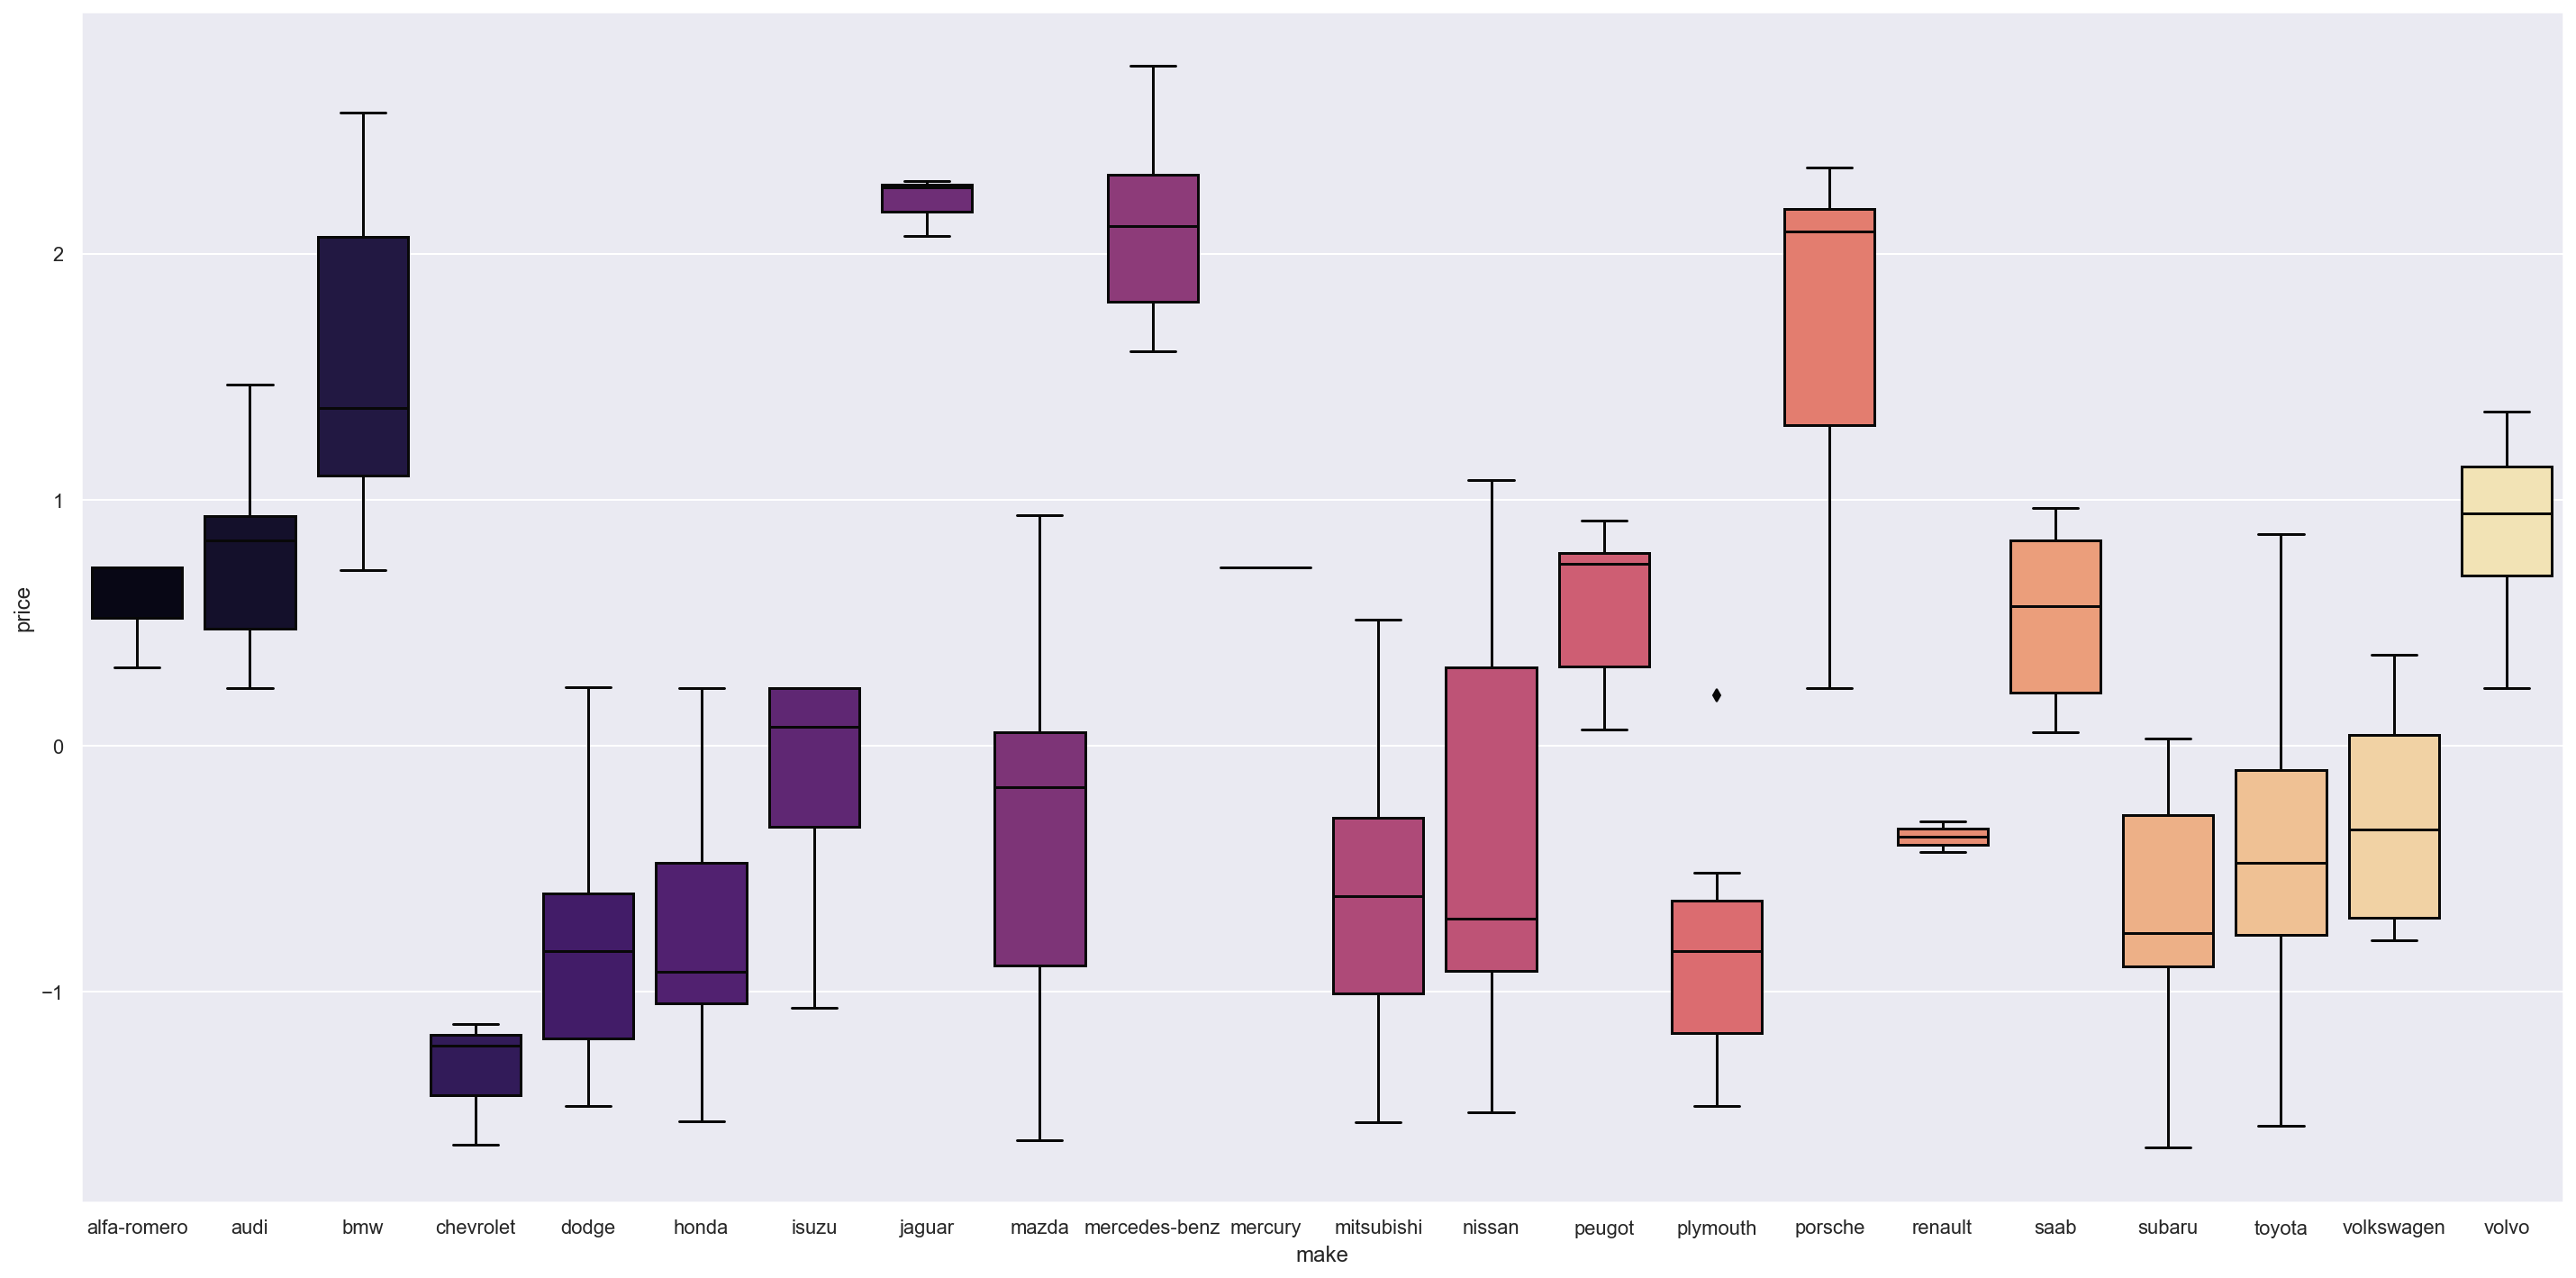

In [64]:
# Mercedes cars are the costliest, closely followed by Jaguar and BMW cars respectively
# Most of the Jaguar cars fall in the 2nd quartile of its price-range
figure = plt.figure(figsize=(20, 10))
box_plot_1 = sns.boxplot(x="make", y="price", data=automobiles_3, palette="magma")
plt.tight_layout()

In [65]:
box_plot_figure_1 = box_plot_1.get_figure()
box_plot_figure_1.savefig("car_make_vs_price.png")

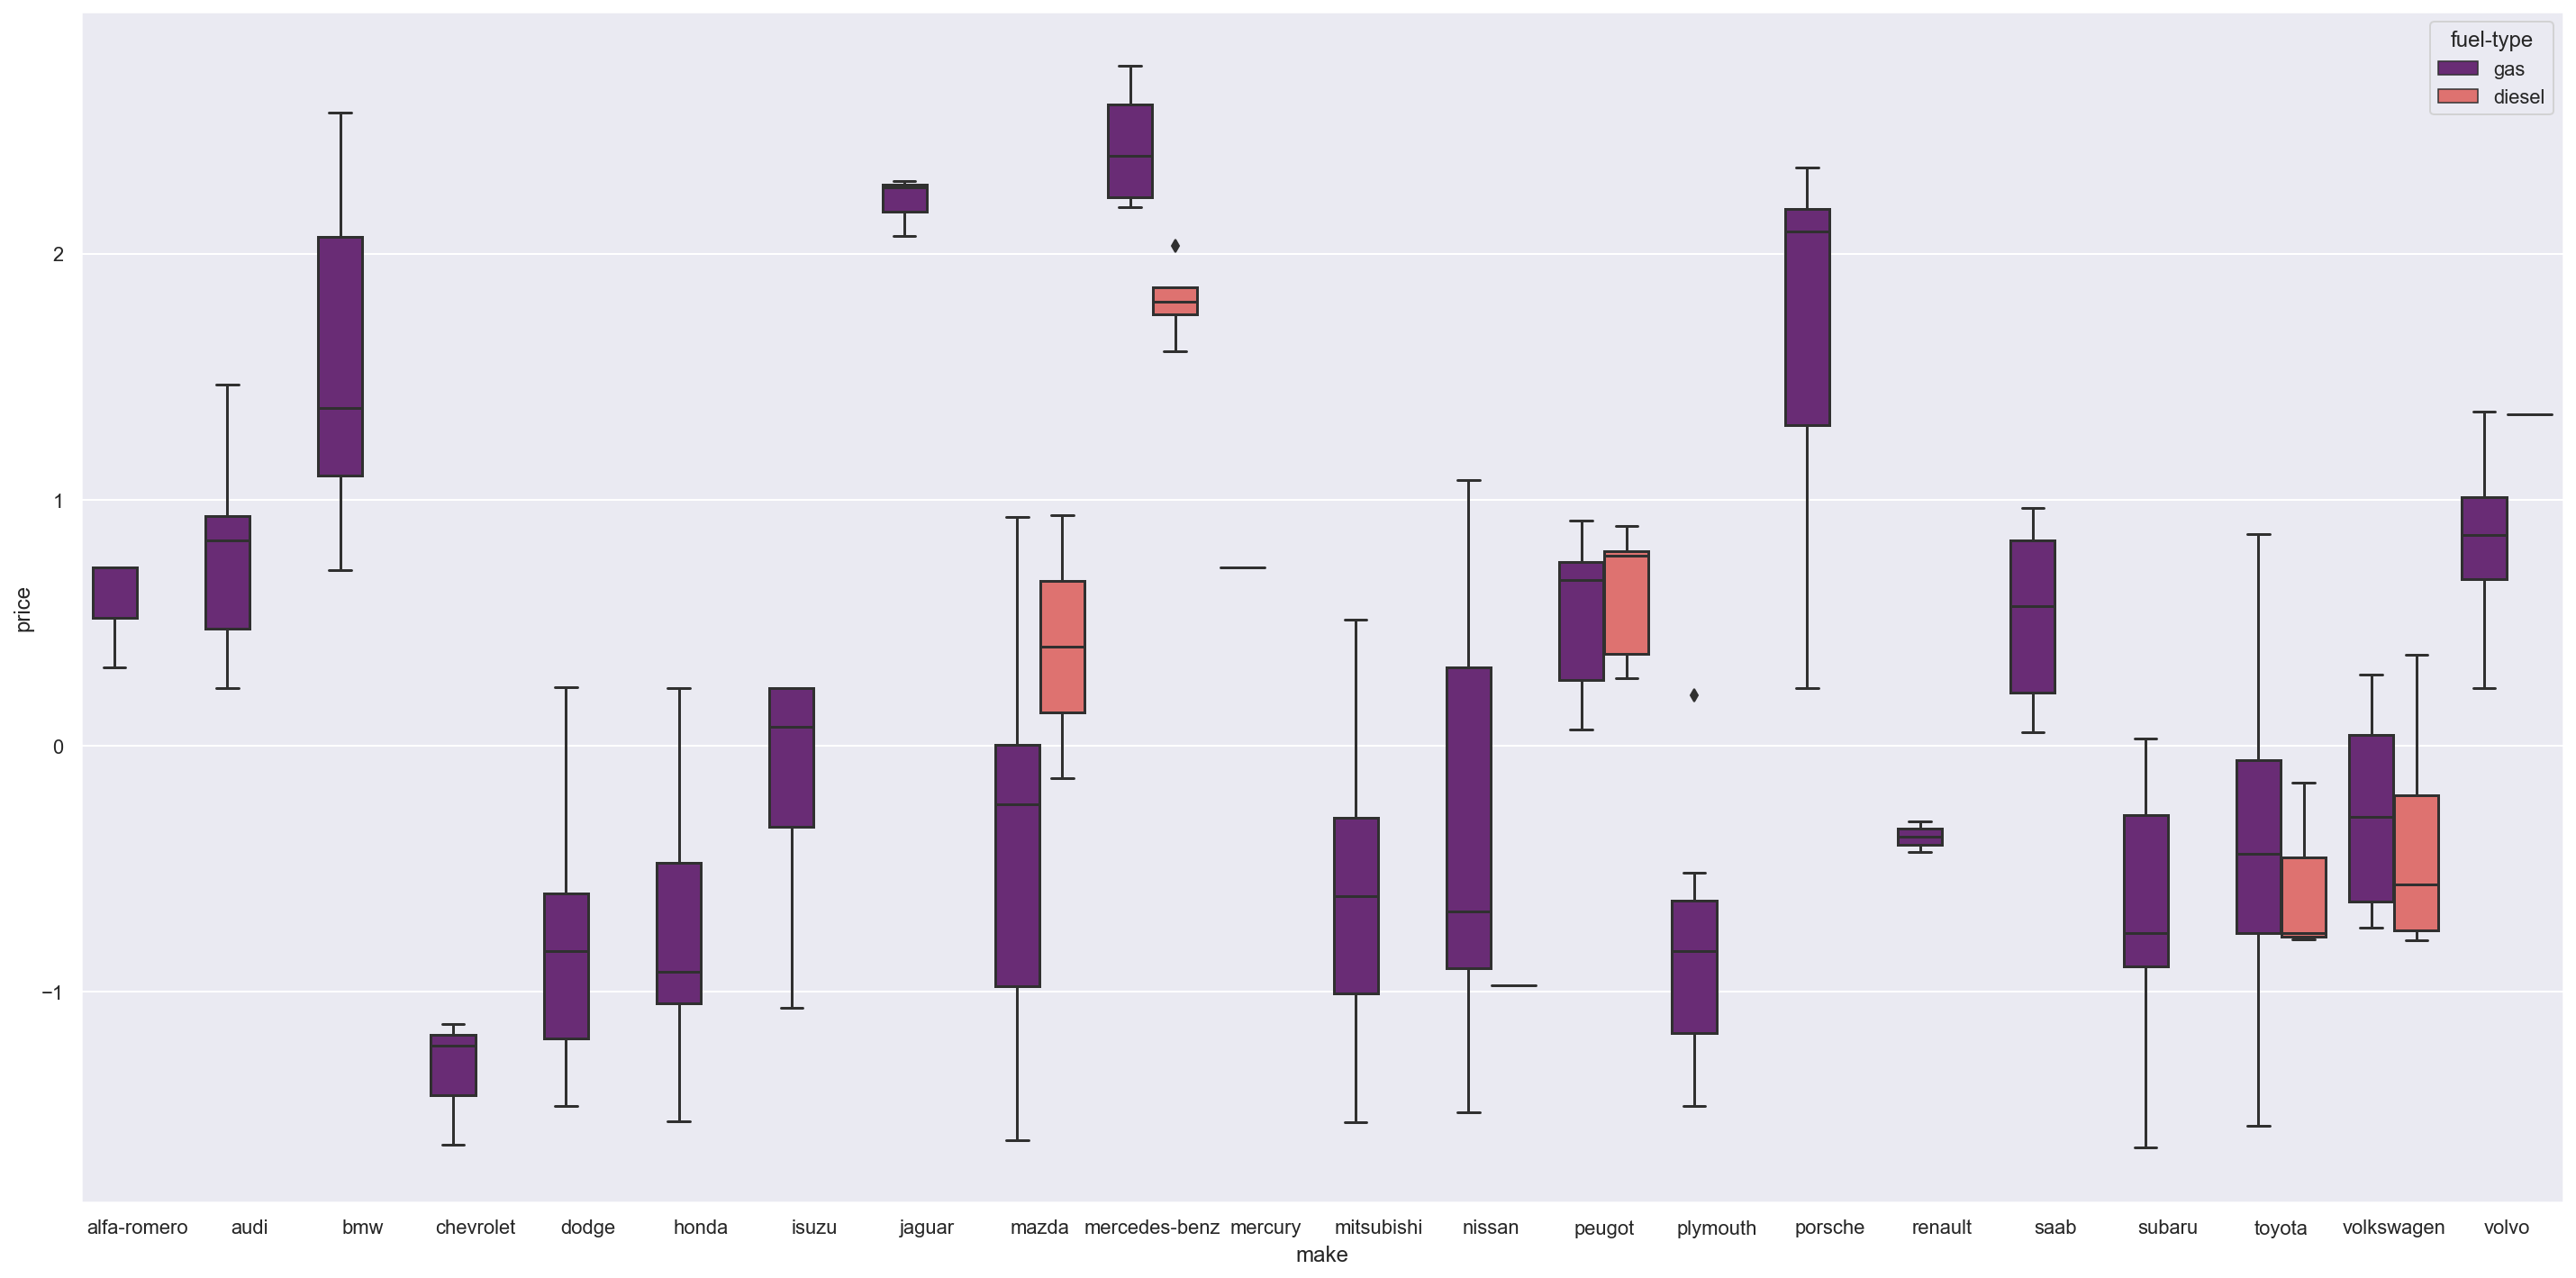

In [66]:
# Very few car companies have diesel powered cars.
# Mostly the low-end car makers have the diesel verions.A notable exception is the Mersedes.
# For Mazda, diesel cars are costlier than their petrol counterparts. The opposite can be seen for Toyota and Volkswagwn.
figure = plt.figure(figsize=(20, 10))
box_plot_2 = sns.boxplot(x="make", y="price", hue="fuel-type", data=automobiles_3, palette="magma")
plt.tight_layout()

In [67]:
box_plot_figure_2 = box_plot_2.get_figure()
box_plot_figure_2.savefig("car_make_and_fuel_type_vs_price.png")

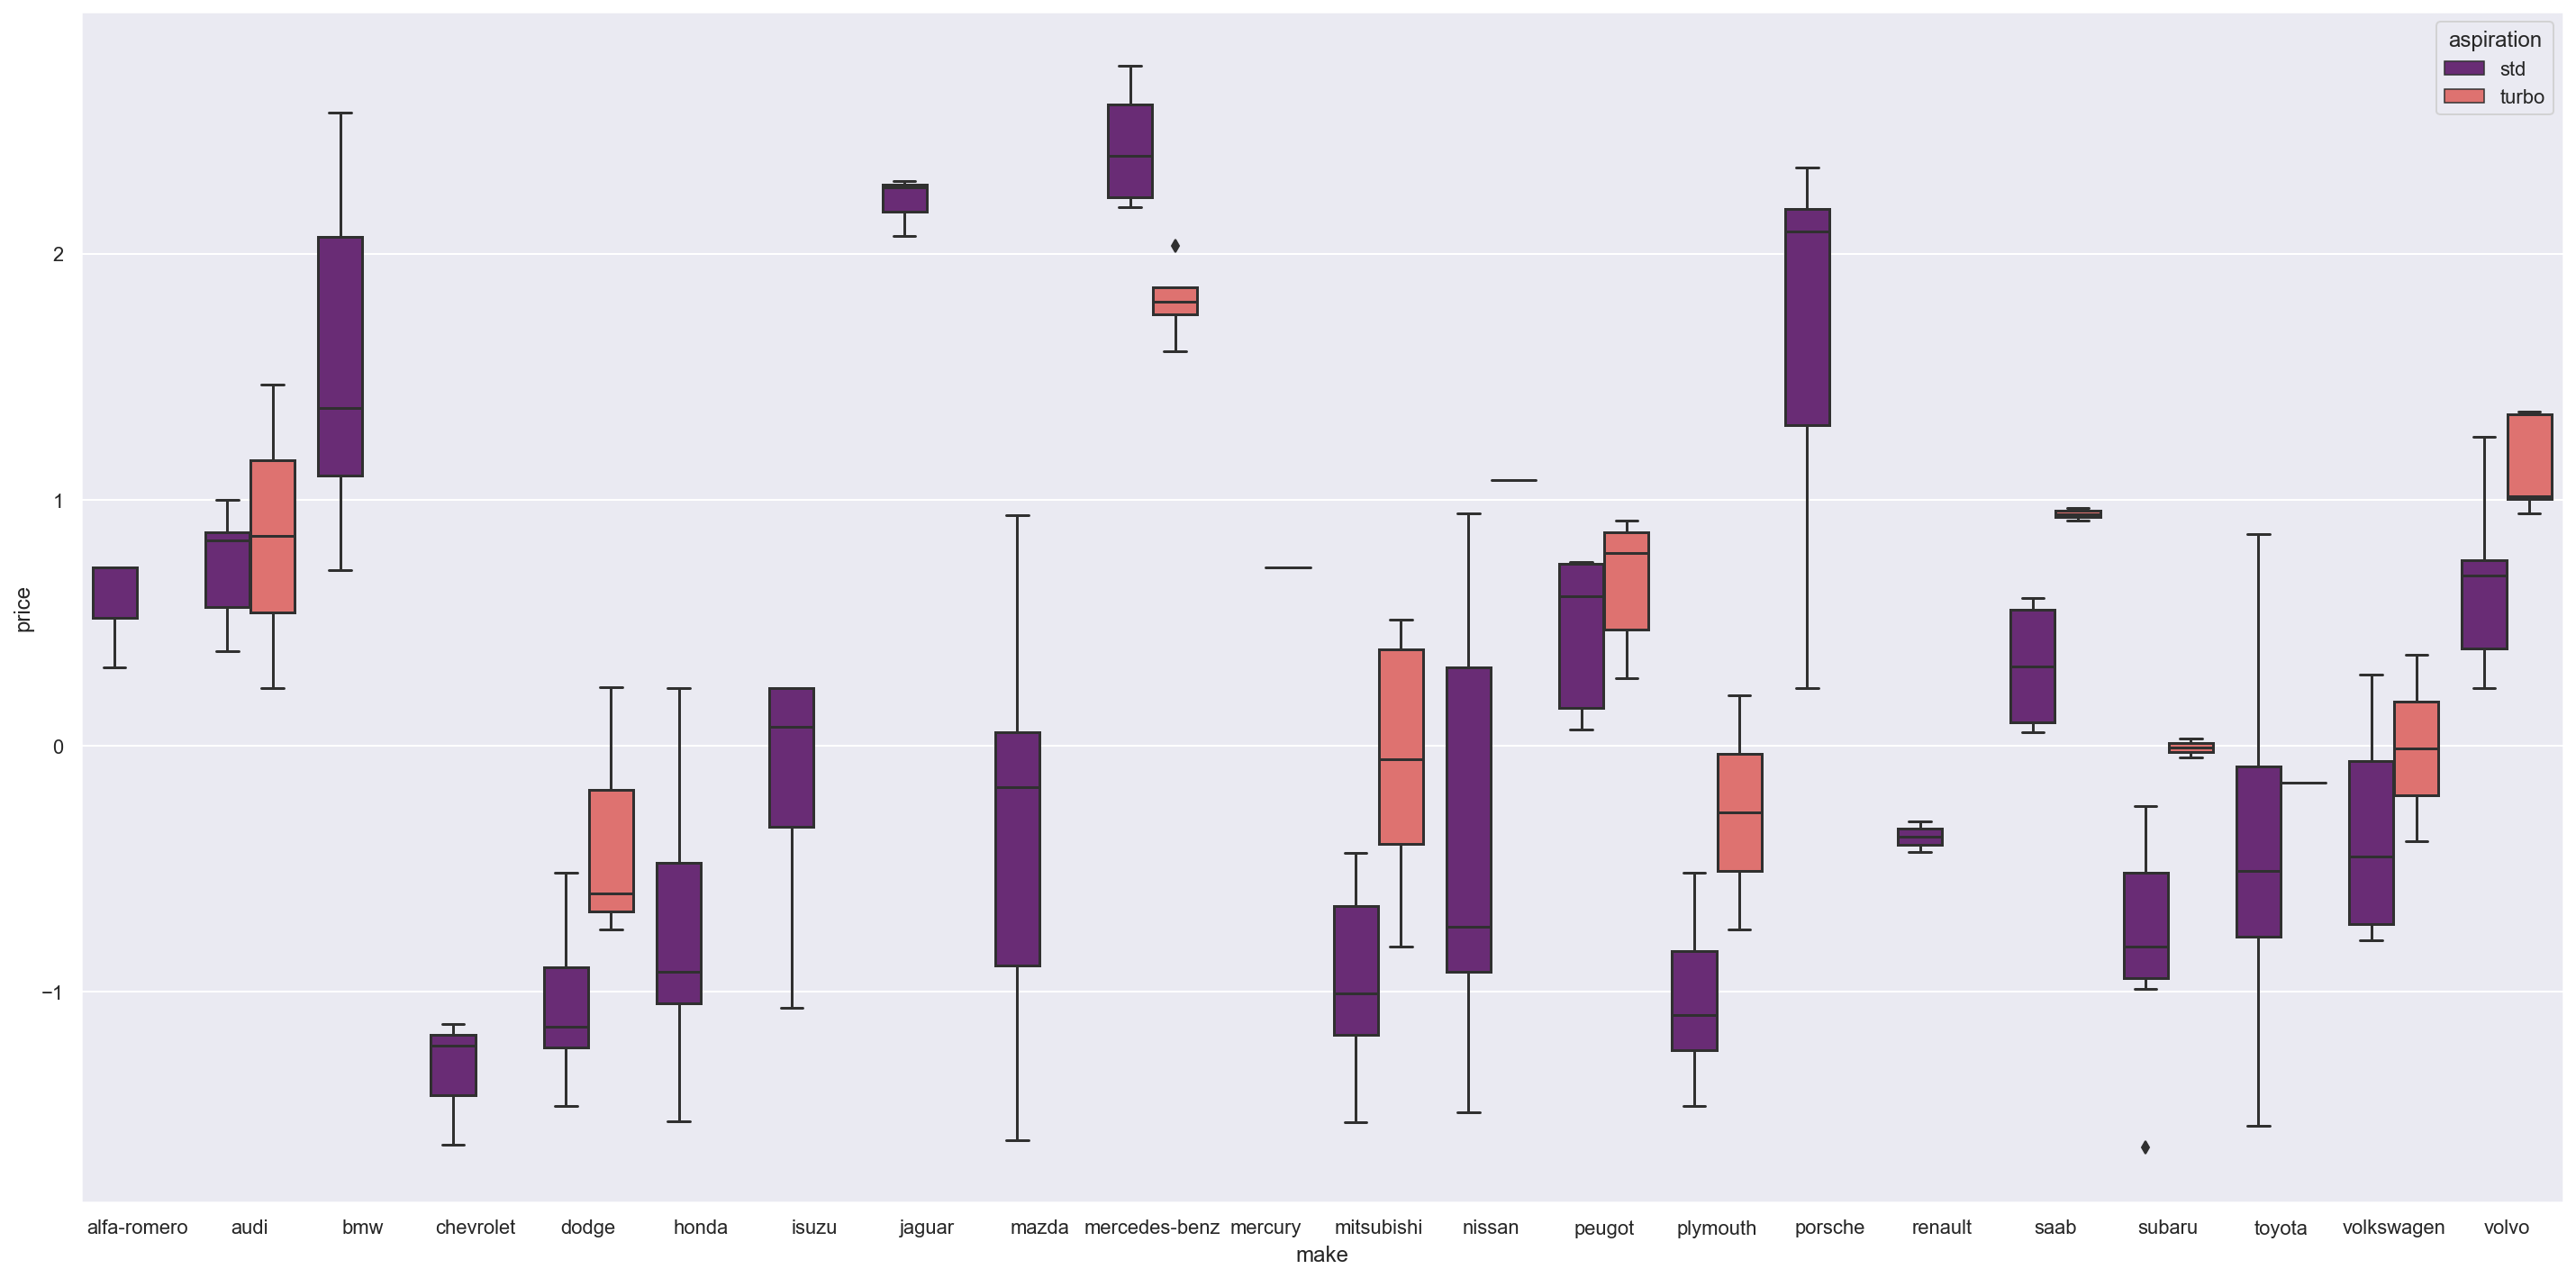

In [68]:
# Surprisingly BMW does not have any Turbo-powered car.
# As a rule-of-thumb, turbo cars are costlier, though Mersedes again surprises us.
figure = plt.figure(figsize=(20, 10))
box_plot_3 = sns.boxplot(x="make", y="price", hue="aspiration", data=automobiles_3, palette="magma")
plt.tight_layout()

In [69]:
box_plot_figure_3 = box_plot_3.get_figure()
box_plot_figure_3.savefig("car_make_and_aspiration_vs_price.png")

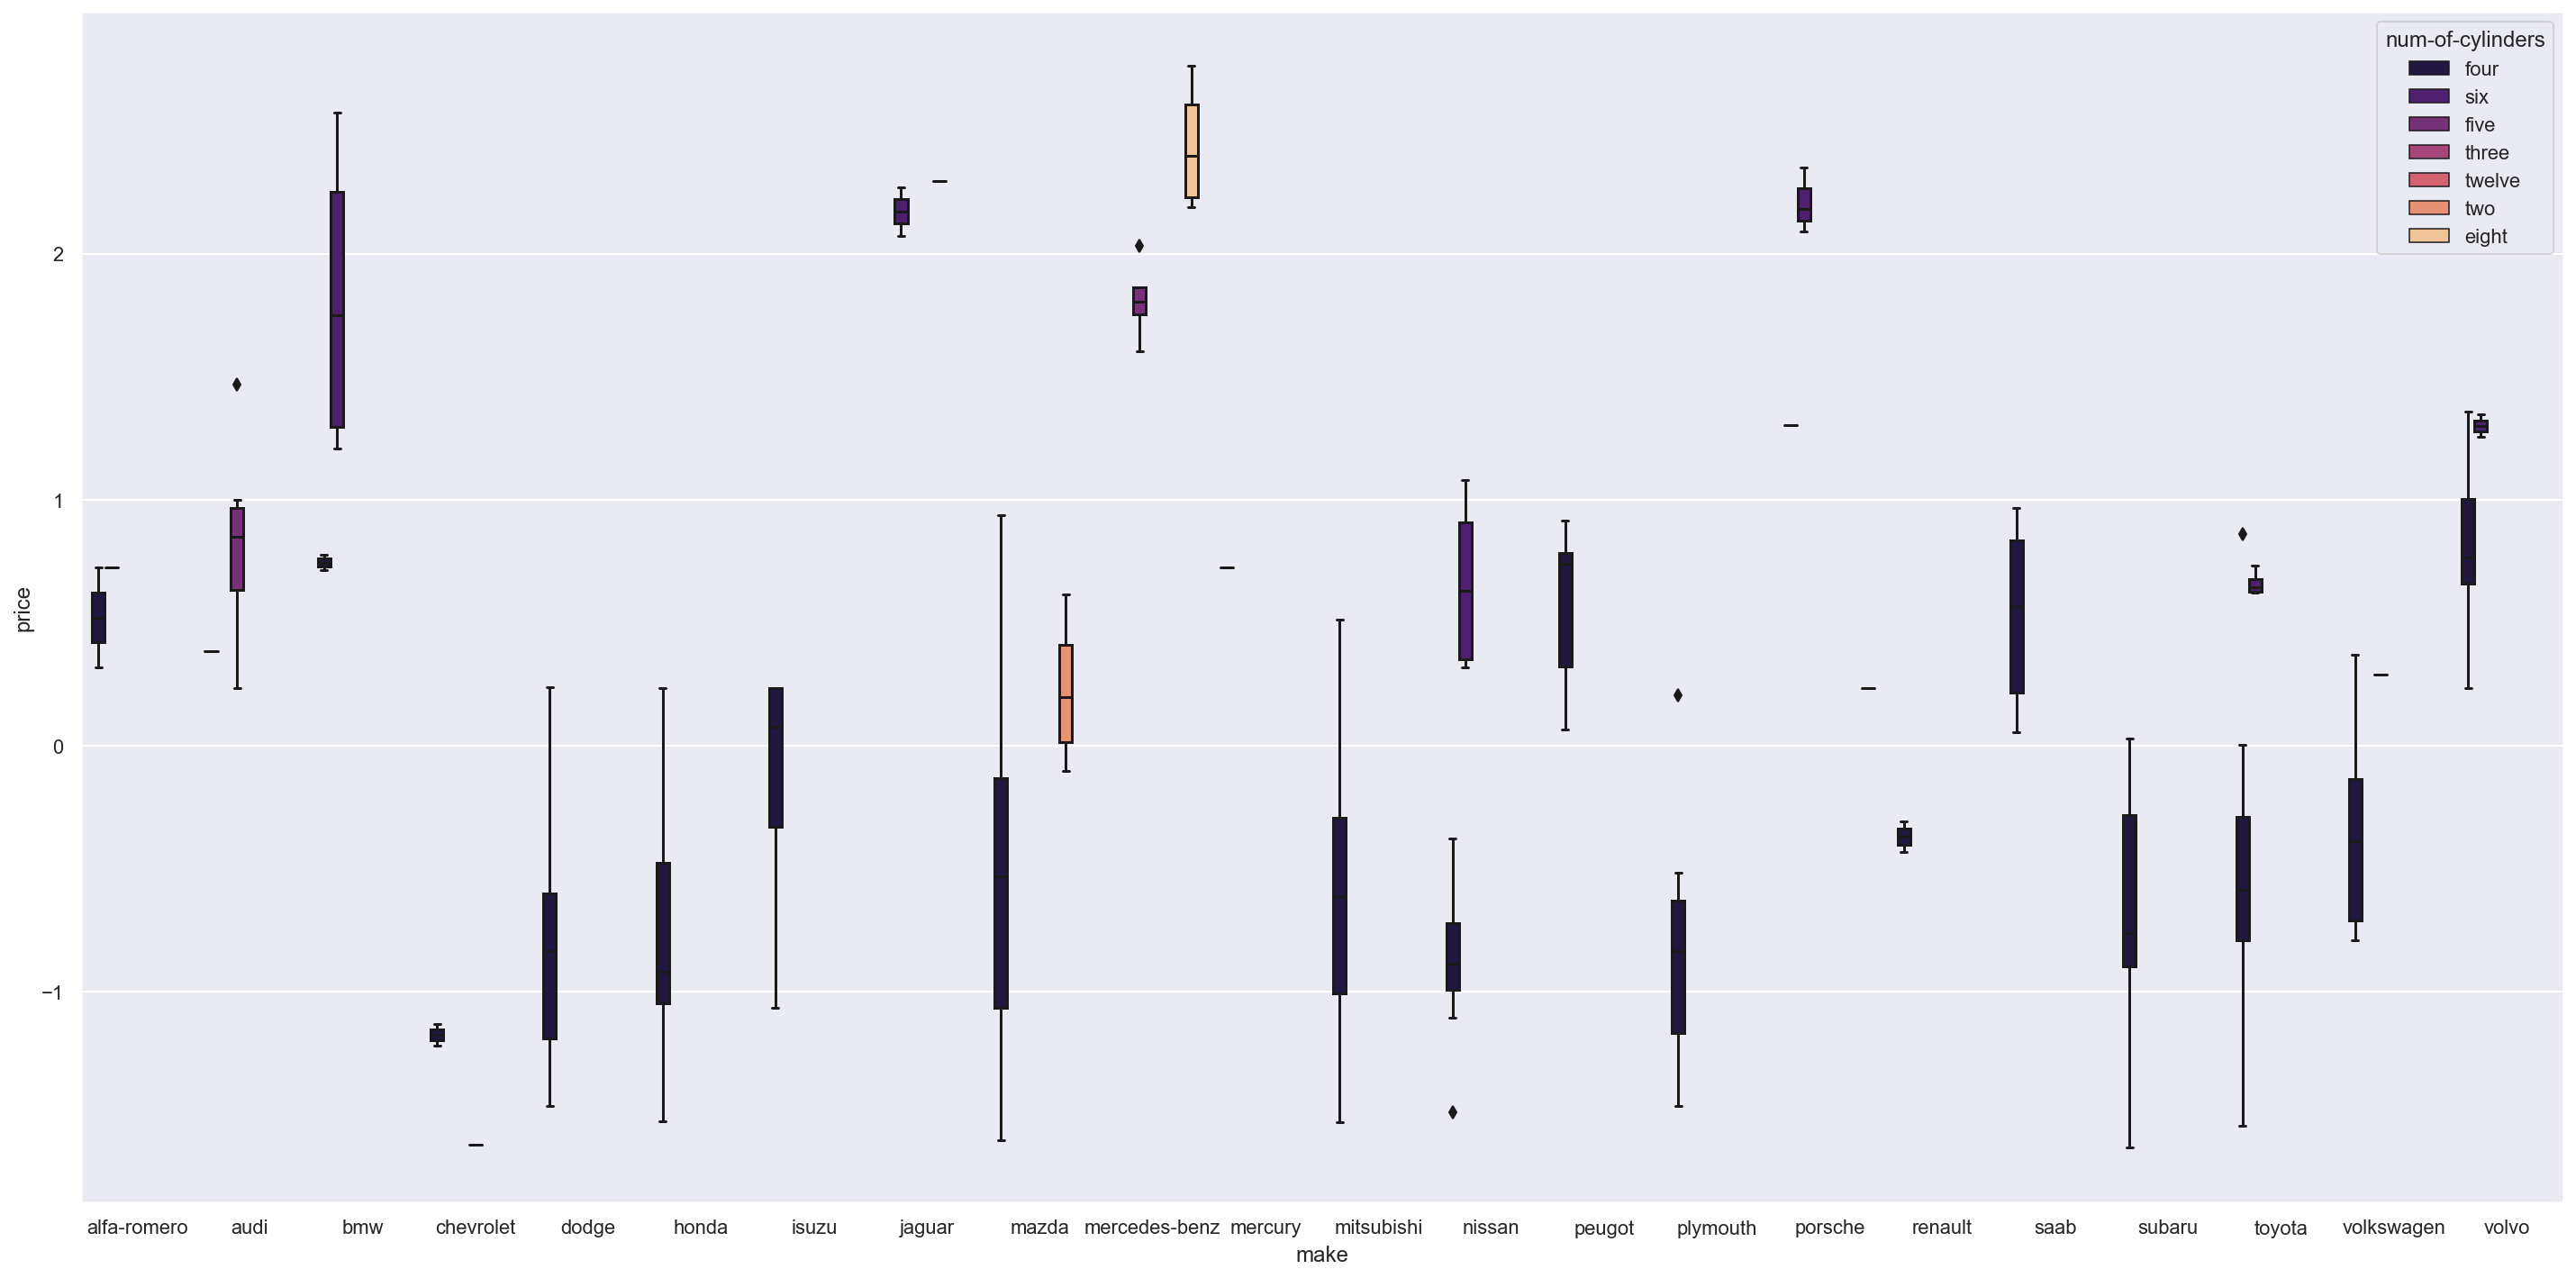

In [70]:
figure = plt.figure(figsize=(20, 10))
box_plot_4 = sns.boxplot(x="make", y="price", hue="num-of-cylinders", data=automobiles_3, palette="magma")
plt.tight_layout()

In [71]:
box_plot_figure_4 = box_plot_4.get_figure()
box_plot_figure_4.savefig("car_make_and_cylinder_count_vs_price.png")

***Data Visualization: How the Numeric Features are Related with Each-Other and with the Target***

In [46]:
automobiles_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    float64
 2   make                     205 non-null    object 
 3   fuel-type                205 non-null    int64  
 4   aspiration               205 non-null    int64  
 5   num-of-doors-four        205 non-null    uint8  
 6   num-of-doors-other       205 non-null    uint8  
 7   num-of-doors-two         205 non-null    uint8  
 8   body-style-convertible   205 non-null    uint8  
 9   body-style-hardtop       205 non-null    uint8  
 10  body-style-hatchback     205 non-null    uint8  
 11  body-style-sedan         205 non-null    uint8  
 12  body-style-wagon         205 non-null    uint8  
 13  drive-wheels-4wd         205 non-null    uint8  
 14  drive-wheels-fwd         2

In [47]:
float_features = automobiles_5.dtypes[automobiles_5.dtypes == np.float64].index.tolist()
float_features.remove("normalized-losses")
float_features

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [48]:
x = automobiles_5.loc[:, float_features]

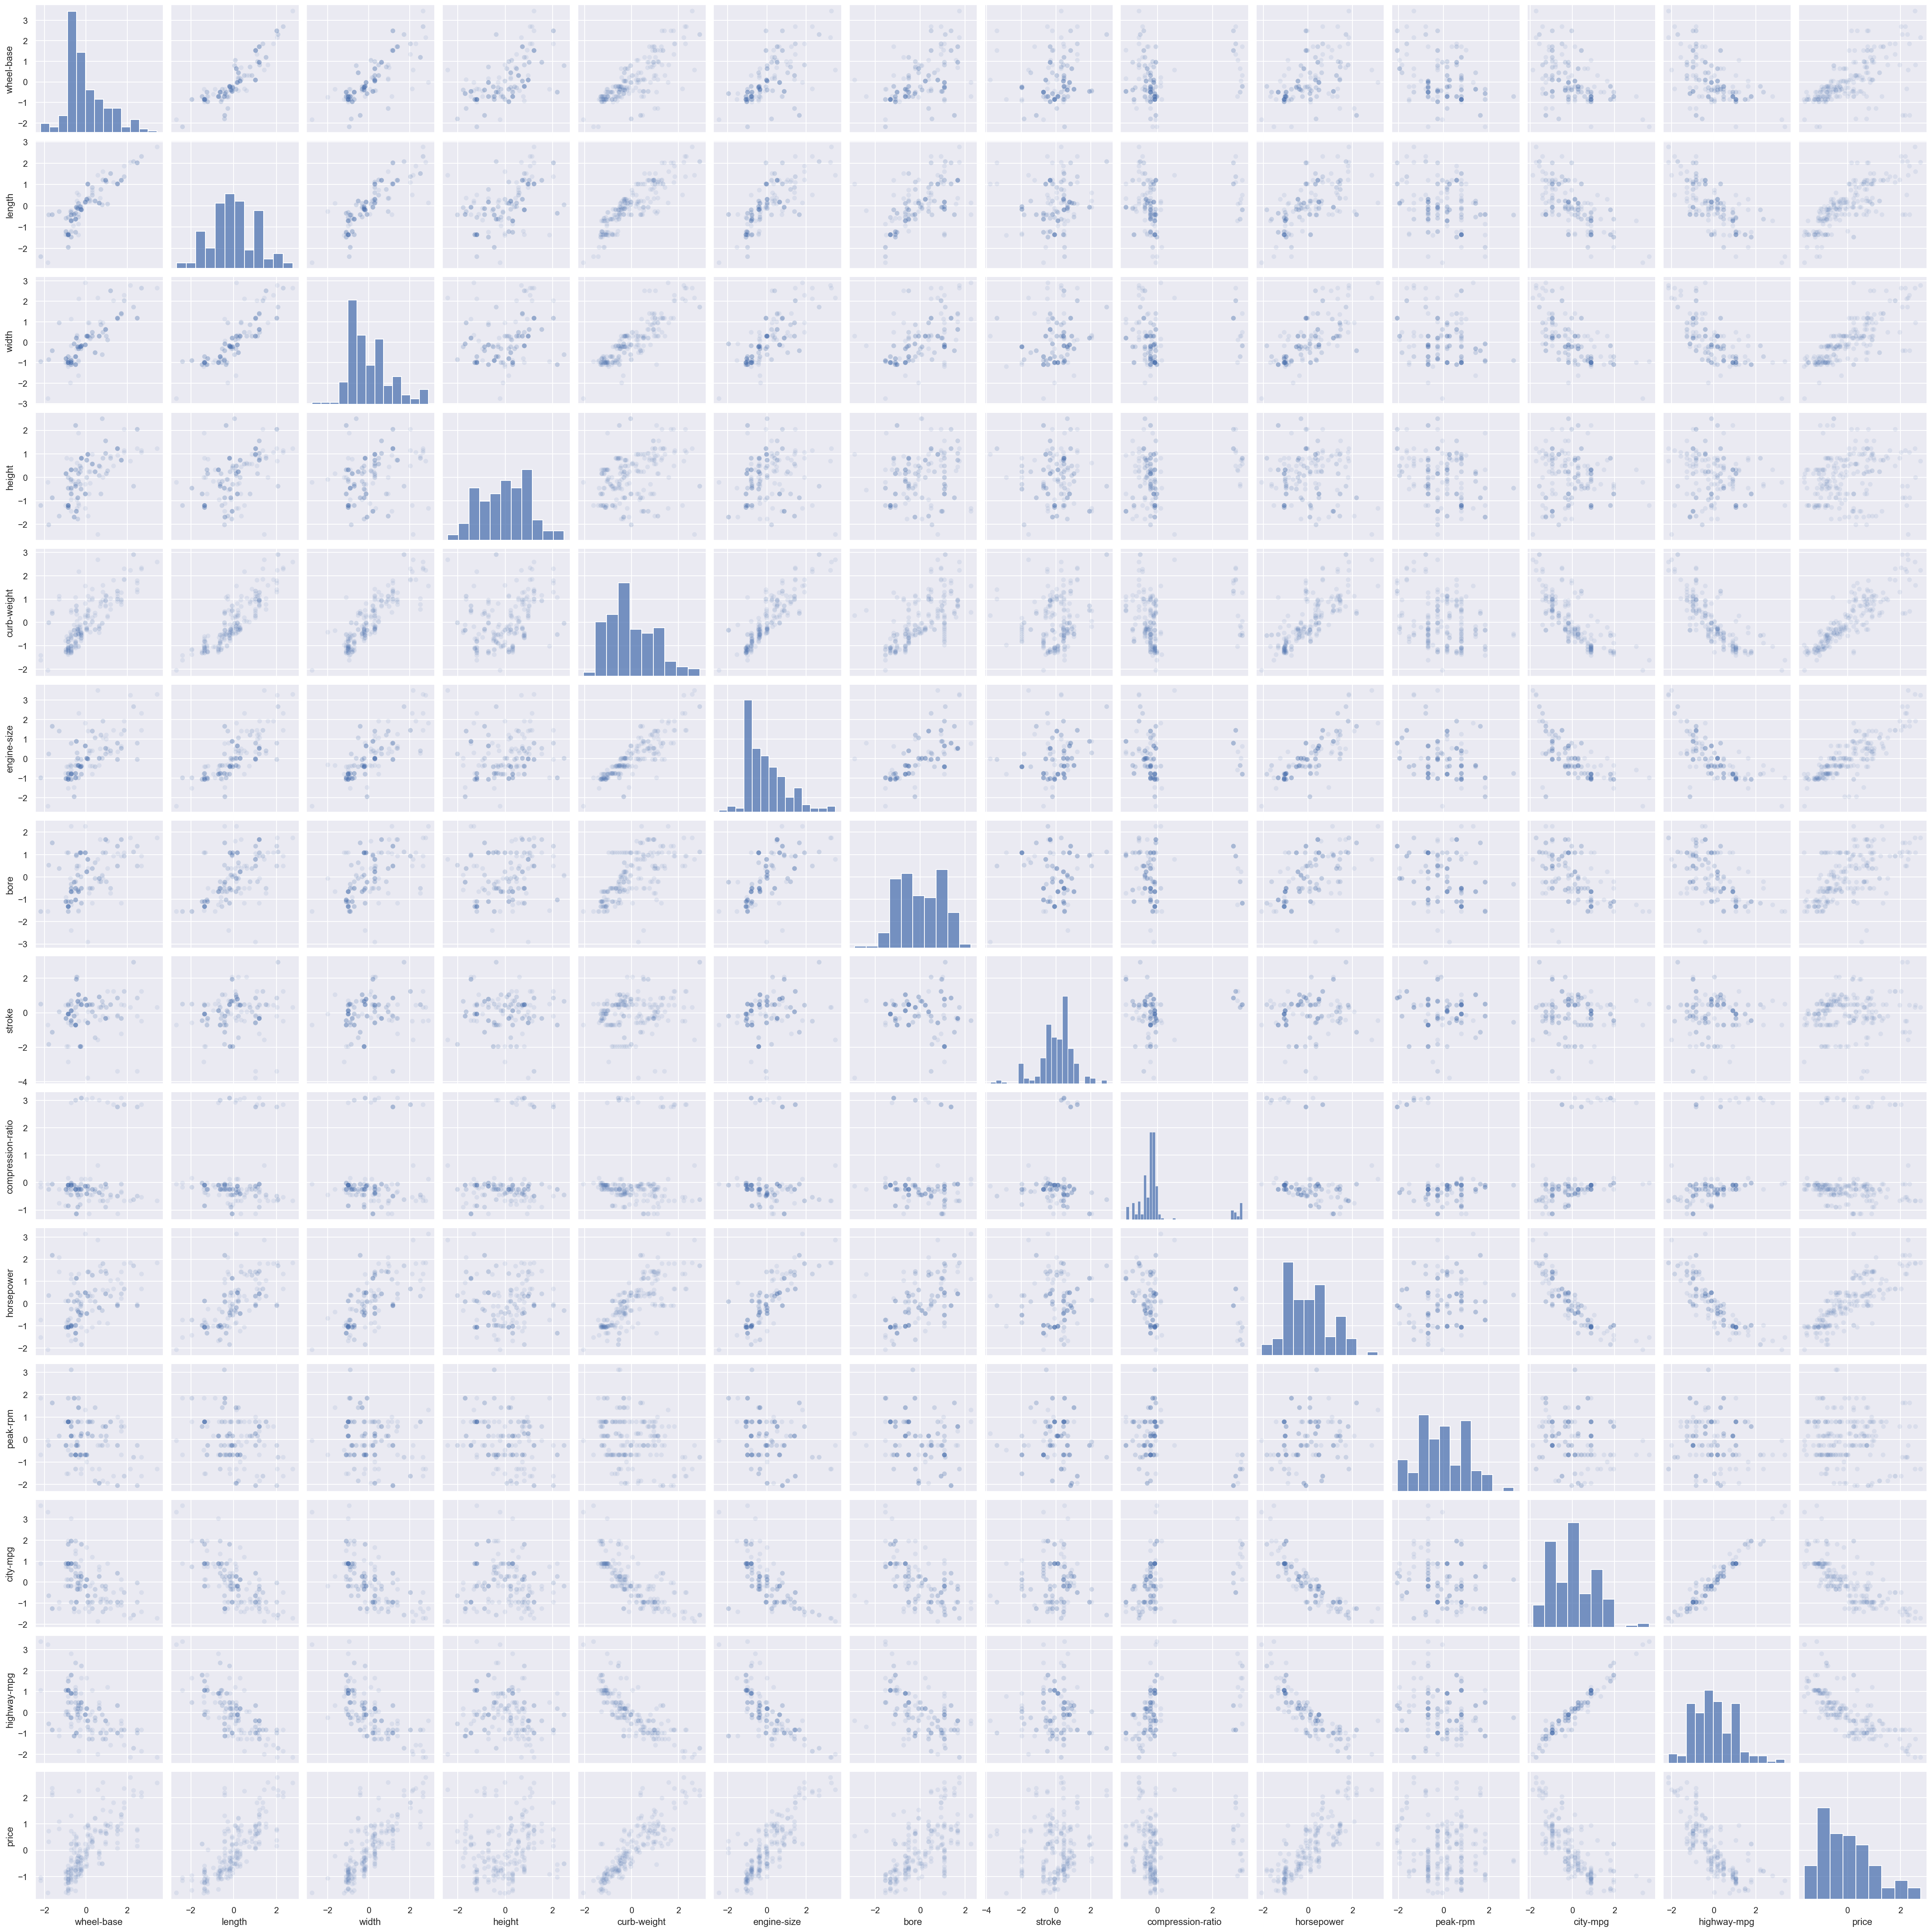

In [49]:
# The target feature - price is left skewed.
# There are multi-collinearity in the data set. For example, wheel-base and length, length and curb-weight, city-mpg and highway-mpg, etc. There are many more.
# Strangely, what could have been thought as major influencing features, like bore, stroke, etc. those are not having linear relationships with price.
# Also, the seemingly non-deciding features, like length, curb-weight have linear relationships with price. But that is because it has linearity with both hight and width and since increased
# height and width mean increased space, that in turn increases the price.
# No polynomial transformation is required
# No feature interaction can be perceived
pairplot = sns.pairplot(data=x, plot_kws=dict(alpha=.1, edgecolor='none'))
pairplot

In [50]:
pairplot_figure = pairplot.fig
pairplot_figure.savefig("numeric_feature_target_correlation_plot.png")

***Data Visualization: How Costly the Safer Cars Become***

<AxesSubplot:xlabel='symboling', ylabel='price'>

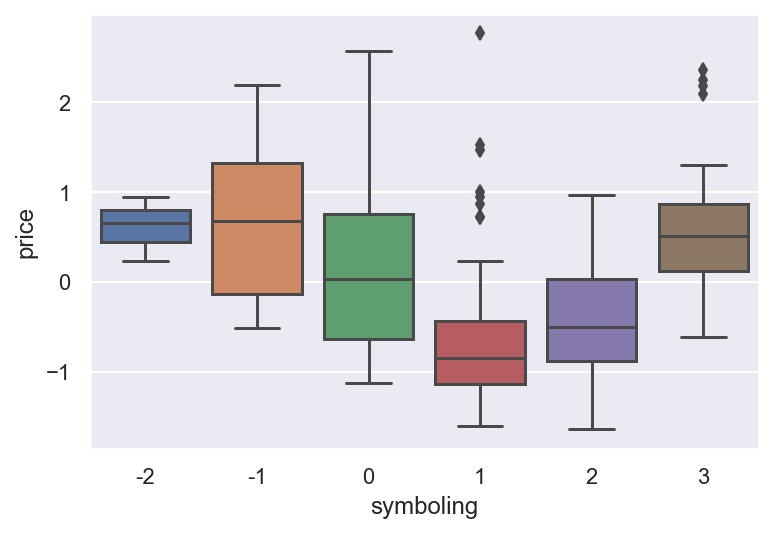

In [51]:
sns.boxplot(x="symboling", y="price", data=automobiles_5)

In [75]:
automobiles_5["symboling"].value_counts().sort_values()

-2     3
-1    22
 3    27
 2    32
 1    54
 0    67
Name: symboling, dtype: int64

***Feature Engineering: How Competative a Price is in a Safety Bracket***

In [52]:
def add_deviation_feature(data, category, feature):
    grouped_data = data.groupby(category)[feature]
    category_mean = grouped_data.transform(lambda x: x.mean())
    category_std = grouped_data.transform(lambda x: x.std())
    data[feature + "-deviation-in-" + category] = (data[feature] - category_mean) / category_std

In [53]:
automobiles_6 = automobiles_5.copy()  # Take a copy of the current data set.

In [54]:
add_deviation_feature(automobiles_6, "symboling", "price")

In [55]:
x = automobiles_6.sample(n=10, random_state=10)

In [56]:
automobiles_6[automobiles_6["symboling"] == -1]

symboling  normalized-losses           make  fuel-type  aspiration  \
28          -1              110.0          dodge          1           0   
67          -1               93.0  mercedes-benz          0           1   
68          -1               93.0  mercedes-benz          0           1   
70          -1               93.0  mercedes-benz          0           1   
71          -1               97.6  mercedes-benz          1           0   
88          -1              137.0     mitsubishi          1           0   
123         -1               74.0       plymouth          1           0   
173         -1               65.0         toyota          1           0   
174         -1               65.0         toyota          0           1   
175         -1               65.0         toyota          1           0   
176         -1               65.0         toyota          1           0   
177         -1               65.0         toyota          1           0   
180         -1               90.0         toyota          1           0   
181         -1               97.6         toyota          1           0   
195         -1               74.0          volvo          1           0   
197         -1               74.0          volvo          1           0   
199         -1               74.0          volvo          1           1   
200         -1               95.0          volvo          1           0   
201         -1               95.0          volvo          1           1   
202         -1               95.0          volvo          1           0   
203         -1               95.0          volvo          0           1   
204         -1               95.0          volvo          1           1   

     num-of-doors-four  num-of-doors-other  num-of-doors-two  \
28                   1                   0                 0   
67                   1                   0                 0   
68                   1                   0                 0   
70                   1                   0                 0   
71                   1                   0                 0   
88                   1                   0                 0   
123                  1                   0                 0   
173                  1                   0                 0   
174                  1                   0                 0   
175                  1                   0                 0   
176                  1                   0                 0   
177                  1                   0                 0   
180                  1                   0                 0   
181                  1                   0                 0   
195                  1                   0                 0   
197                  1                   0                 0   
199                  1                   0                 0   
200                  1                   0                 0   
201                  1                   0                 0   
202                  1                   0                 0   
203                  1                   0                 0   
204                  1                   0                 0   

     body-style-convertible  body-style-hardtop  body-style-hatchback  \
28                        0                   0                     0   
67                        0                   0                     0   
68                        0                   0                     0   
70                        0                   0                     0   
71                        0                   0                     0   
88                        0                   0                     0   
123                       0                   0                     0   
173                       0                   0                     0   
174                       0                   0                     0   
175                       0                   0                     1   
176

In [76]:
cars_with_risk_rating_zero = automobiles_6[automobiles_6["symboling"] == 0]
cars_with_risk_rating_zero[cars_with_risk_rating_zero["make"] == "toyota"][["symboling", "make", "price"]]

symboling    make     price
153          0  toyota -1.028585
154          0  toyota -0.761676
155          0  toyota -0.548849
156          0  toyota -1.022769
157          0  toyota -0.948650
158          0  toyota -0.761676
159          0  toyota -0.789933
160          0  toyota -0.802909
161          0  toyota -0.647627
162          0  toyota -0.441589

***Hypothesis Testing***

**H0: Cars with Higher Horsepowers Come at Higher Cost**

In [57]:
x = automobiles_6.sample(n=50, random_state=10)

In [58]:
horsepowers = x["horsepower"]
prices = x["price"]

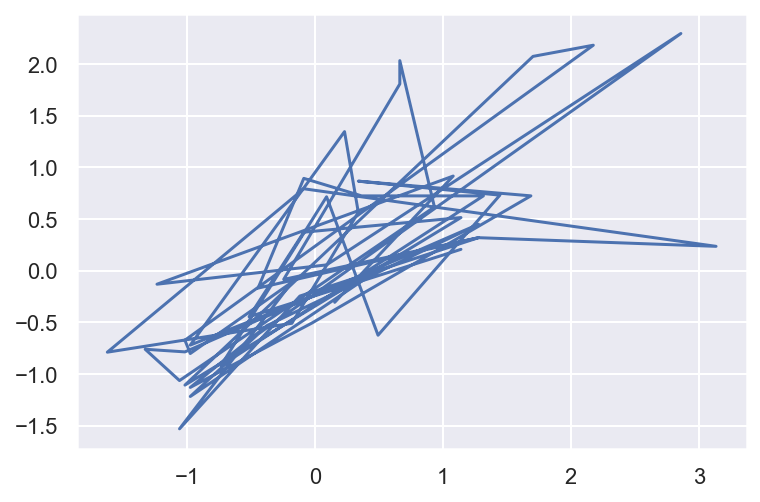

In [59]:
plt.plot(horsepowers, prices)

In [77]:
stat, p = spearmanr(horsepowers, prices)
if p > 0.05:
    print(f"p-value is {p}; Null hypothesis is true.")
else:
    print(f"p-value is {p}; Null hypothesis can be rejected.")

p-value is 5.582910986146041e-12; Null hypothesis can be rejected.


**H0: Toyota and Nissan Cars Have the Same Average Price**

In [61]:
x = automobiles_6.sample(n=80, random_state=10)

In [62]:
toyota_cars_prices = x[x["make"] == "toyota"]["price"].values.astype(np.float16)
nissan_cars_prices = x[x["make"] == "nissan"]["price"].values.astype(np.float16)

In [78]:
stat, p = ttest_ind(toyota_cars_prices, nissan_cars_prices)
if p > 0.05:
    print(f"p-value is {p}; Null hypothesis is true.")
else:
    print(f"p-value is {p}; Null hypothesis can be rejected.")

p-value is 0.2677992209484813; Null hypothesis is true.
